In [1]:
# data

# A
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1
   ]

# B
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0
  ]

# C
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0
    
]

In [3]:
#creating labels
y =[[1,0,0],
    [0,1,0],
    [0,0,1]]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

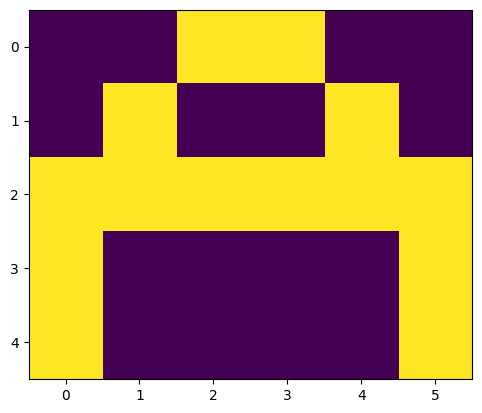

In [6]:
#visualize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [8]:
# convert data and labels into numpy array
x = [np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y = np.array(y)
print(x ,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [9]:
#activation functions

def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [29]:
# creating feed forward nn
def f_forward(x,w1,w2):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

In [25]:
import numpy as np

def generate_wt(x, y):
    l = []
    for i in range(x * y):
        l.append(np.random.randn())  
    return np.array(l).reshape(x, y)  

        

In [38]:
def loss(out,y):
    s = (np.square(out-y))
    s = np.sum(s)/len(y)
    return(s)

In [49]:
#back propagation

def back_prop(x, y, w1, w2, alpha):
    # Forward pass
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    # Backward pass
    d2 = a2 - y  # Output layer error
    d1 = np.multiply(np.dot(d2, w2.T), a1 * (1 - a1))  # Hidden layer error

    # Weight adjustments
    w1_adj = np.outer(x, d1)
    w2_adj = np.outer(a1, d2)

    # Update weights
    w1 -= alpha * w1_adj
    w2 -= alpha * w2_adj

    return w1, w2

In [45]:
def train(x,y,w1,w2,alpha=0.01, epoch = 10):
    acc=[]
    losses = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i],w1,w2)
            l.append(loss(out,y[i]))
            w1,w2 = back_prop(x[i],y[i],w1,w2,alpha)
        print("Epochs:",j+1, "acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losses.append(sum(l)/len(x))
    return(acc,losses,w1,w2)

In [20]:
def predict(x,w1,w2):
    Out = f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k=i
    if(k==0):
        print("Image is of letter A")
    elif(k==1):
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()
    

In [27]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1,"\n\n",w2)


[[-0.57120046 -0.04693138 -1.83238614 -0.59148445  0.25992376]
 [-0.38112666 -1.12489281  1.34006264 -1.98246142  0.14486967]
 [ 2.402237    0.98555698 -0.0887511   0.35513518 -0.52689415]
 [-1.21770405  1.81976786 -1.33877155 -0.58932546 -0.2892806 ]
 [ 0.32182464 -0.06781122  1.66818386  0.06811449  1.52599349]
 [-0.80963043 -0.42594617  2.0958454  -0.25204651 -1.71286808]
 [-0.29388007  0.65839732 -0.12020272 -1.7584567   0.65944889]
 [ 1.45839632 -0.89360762  0.89131711  0.46293896 -1.55149761]
 [-0.52879966 -0.1644398  -0.33634919 -0.67467087  0.60564508]
 [ 0.8449601   1.18975341 -0.75444298 -0.20386382 -0.20315902]
 [-0.55153714  0.13332948  1.00179629  1.78685114 -1.47953102]
 [ 2.20890097  0.11018411 -0.42787148 -0.31731273  1.02636734]
 [ 0.04702185  0.00996637 -0.93809889  0.85861435 -0.30827108]
 [ 1.11371604  0.19895287 -0.16468367 -0.47734303 -0.62755172]
 [ 0.92849222  2.81818858  0.44125101  0.40830165 -0.83452977]
 [-1.55933798 -1.29785604 -0.32482467 -0.66305364  2.13

In [50]:
acc,losses,w1,w2 = train(x,y,w1,w2,0.1,100)

Epochs: 1 acc: 62.13542867586443
Epochs: 2 acc: 66.28186522136133
Epochs: 3 acc: 70.05985950156892
Epochs: 4 acc: 73.25642738638989
Epochs: 5 acc: 75.76853083153988
Epochs: 6 acc: 77.66743234625653
Epochs: 7 acc: 79.10710381359948
Epochs: 8 acc: 80.2331752462886
Epochs: 9 acc: 81.15103947675037
Epochs: 10 acc: 81.92960020011688
Epochs: 11 acc: 82.61358763013885
Epochs: 12 acc: 83.2329780913542
Epochs: 13 acc: 83.80816371887114
Epochs: 14 acc: 84.35269384808338
Epochs: 15 acc: 84.87506925537079
Epochs: 16 acc: 85.38015455335328
Epochs: 17 acc: 85.87030709474672
Epochs: 18 acc: 86.34621915577414
Epochs: 19 acc: 86.80749922219132
Epochs: 20 acc: 87.25306104863726
Epochs: 21 acc: 87.6814092225182
Epochs: 22 acc: 88.09089864884614
Epochs: 23 acc: 88.48000512795949
Epochs: 24 acc: 88.84759055408115
Epochs: 25 acc: 89.19310743554783
Epochs: 26 acc: 89.51668796189662
Epochs: 27 acc: 89.819101287311
Epochs: 28 acc: 90.10161025893676
Epochs: 29 acc: 90.3657846984671
Epochs: 30 acc: 90.6133239225

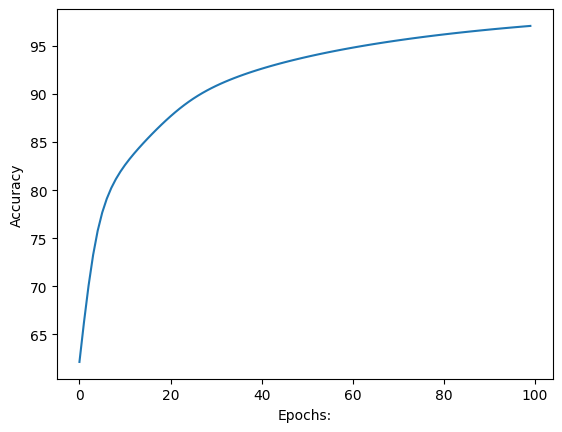

In [53]:
import matplotlib.pyplot as plt1

#plotting accurracy
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs:')
plt1.show()

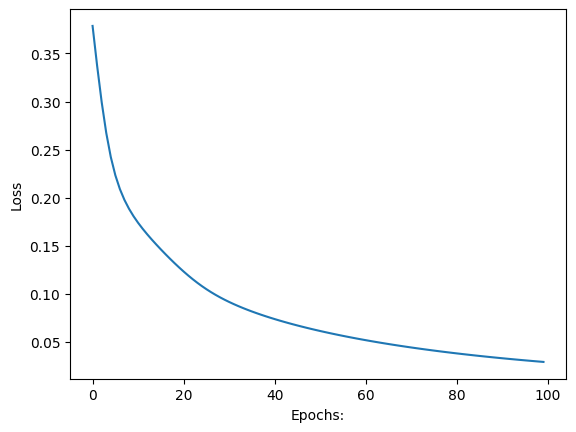

In [54]:
#plot loss
plt1.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epochs:')
plt1.show()


In [55]:
print(w1,"\n\n",w2)

[[-0.57120046 -0.04693138 -1.83238614 -0.59148445  0.25992376]
 [-0.35063483 -1.59659954  1.32494328 -2.06995962  0.33066505]
 [ 2.06535238  0.53198353  0.17579905  0.64577572 -0.62774054]
 [-1.55458867  1.3661944  -1.0742214  -0.29868491 -0.39012699]
 [ 0.35231646 -0.53951795  1.6530645  -0.01938371  1.71178887]
 [-0.80963043 -0.42594617  2.0958454  -0.25204651 -1.71286808]
 [-0.29388007  0.65839732 -0.12020272 -1.7584567   0.65944889]
 [ 1.1215117  -1.34718107  1.15586725  0.7535795  -1.652344  ]
 [-0.52879966 -0.1644398  -0.33634919 -0.67467087  0.60564508]
 [ 0.8449601   1.18975341 -0.75444298 -0.20386382 -0.20315902]
 [-0.89521466  0.84804989  1.13455669  2.06562241 -1.69621989]
 [ 2.20890097  0.11018411 -0.42787148 -0.31731273  1.02636734]
 [-0.32035459  0.02809964 -0.65842938  1.2367531  -0.59491285]
 [ 0.77683142 -0.25462059  0.09986648 -0.18670249 -0.72839811]
 [ 0.5848147   3.53290899  0.57401141  0.68707293 -1.05121865]
 [-1.9030155  -0.58313563 -0.19206427 -0.38428236  1.92

Image is of letter C


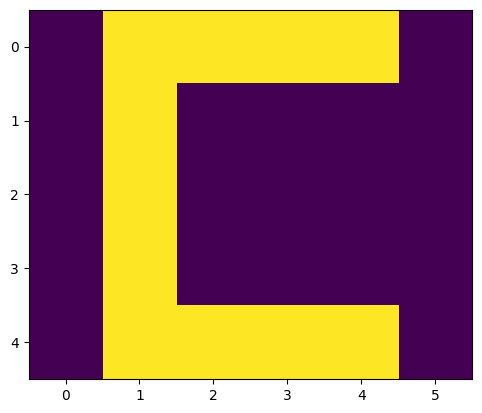

In [56]:
predict(x[2],w1,w2)

Image is of letter A


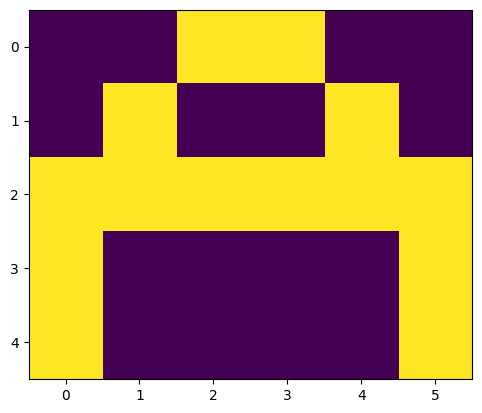

In [57]:
predict(x[0],w1,w2)

Image is of letter B


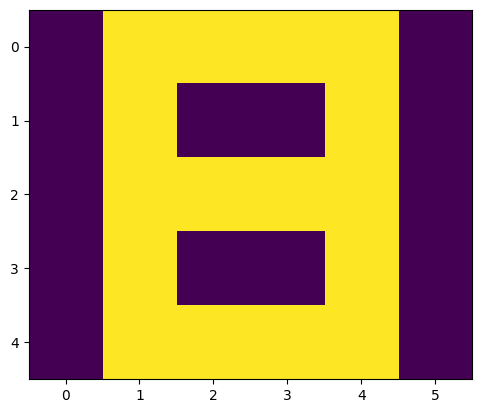

In [58]:
predict(x[1],w1,w2)